# **Import Module**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

# **Data**

In [2]:
data_x = torch.arange(1,101,step=1, dtype=torch.float).reshape(-1,2)
data_y = torch.arange(5,155, step=3, dtype=torch.float)

df = pd.DataFrame(data_x, columns=['Fitur 1', 'Fitur 2'])

df['Target'] = data_y

# **Linear Regression**

In [64]:
import torch

class LinearRegression:
    def __init__(self):
        self.a = None
        self.b = None
        self.loss = []

    def fit(self, x, y, epochs: int = 1000, learning_rate: float = 0.01):
        count_of_data_features = x.shape[1]

        self.a = torch.zeros(count_of_data_features, 1, dtype=torch.float32)
        self.b = torch.zeros(1, dtype=torch.float32)

        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

        for epoch in range(epochs):
            linreg = torch.matmul(x, self.a) + self.b

            mse = torch.mean((y - linreg) ** 2)

            grad_a = -2 * torch.matmul(x.T, (y - linreg)) / len(x)
            grad_b = -2 * torch.sum(y - linreg) / len(x)

            self.a = self.a - learning_rate * grad_a
            self.b = self.b - learning_rate * grad_b

            self.loss.append(mse.item())

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {mse.item():.4f}")


    def predict(self, x):

        if self.a is None or self.b is None:
            raise ValueError("Model belum dilatih. Gunakan '[objek].fit()' terlebih dahulu")

        if self.a.shape[0] != x.shape[1]:
            raise ValueError("Jumlah fitur input tidak sesuai dengan model yang dilatih.")

        x = torch.tensor(x, dtype=torch.float32)

        return torch.matmul(x, self.a) + self.b

    def visualize(self):
      if not self.loss:
        raise ValueError("Model belum dilatih. Gunakan '[objek].fit()' terlebih dahulu")

      plt.figure(figsize=(12, 6))

      epochs = range(len(self.loss))
      plt.plot(epochs, self.loss, label="Loss (Line)", color="blue")
      plt.scatter(epochs, self.loss, label="Loss (Points)", color="red")

      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.title("Loss per Epoch")
      plt.legend()
      plt.grid(True)
      plt.show()

# **Train Model**

In [65]:
model = LinearRegression()

In [66]:
x = df.drop('Target', axis=1).values
y = df['Target'].values

model.fit(x, y, epochs=100, learning_rate=0.0001)

Epoch 0: Loss = 8036.5000
Epoch 10: Loss = 1.8360
Epoch 20: Loss = 1.8333
Epoch 30: Loss = 1.8306
Epoch 40: Loss = 1.8279
Epoch 50: Loss = 1.8252
Epoch 60: Loss = 1.8225
Epoch 70: Loss = 1.8198
Epoch 80: Loss = 1.8171
Epoch 90: Loss = 1.8144


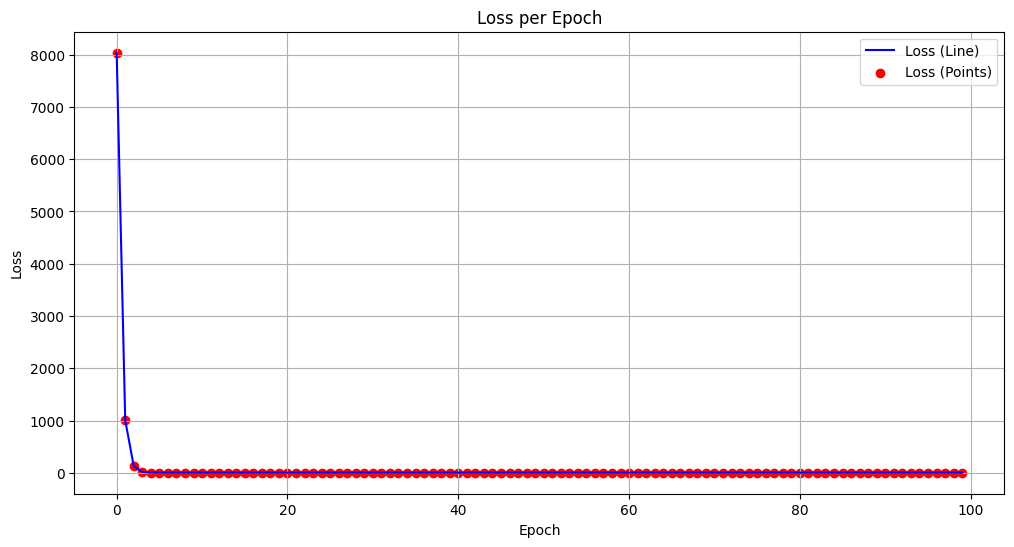

In [67]:
model.visualize()